## 패키지 준비

In [ ]:
%pip install matplotlib
%pip install scikit-learn

## 샘플 데이터 준비

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                        44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                        1000.0])

## 훈련 세트, 테스트 세트 분리

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## K-NR 모델 훈련

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 신규 데이터 예측 결과 출력 (길이 -> 무게)

In [5]:
print(knr.predict([[50]]))

[984.]


## 산점도 출력

Text(0, 0.5, 'Weight')

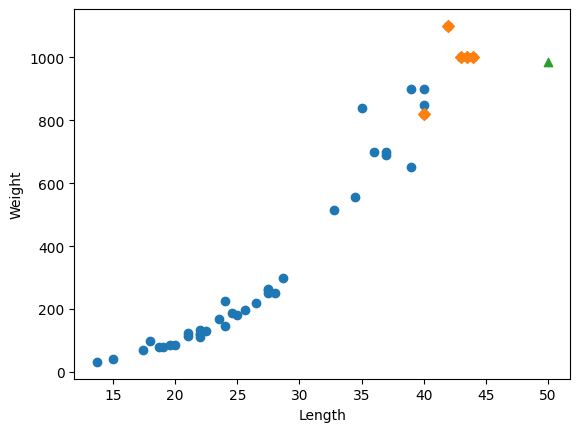

In [7]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 984, marker = '^')
plt.xlabel("Length")
plt.ylabel("Weight")

## 선형 회귀 훈련 및 신규 데이터 예측 결과 출력

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1205.68951148]


## 선형 회귀 (기울기, 절편) 계산

In [10]:
print(lr.coef_, lr.intercept_)

[37.70552144] -679.58656066074


## 산점도 출력

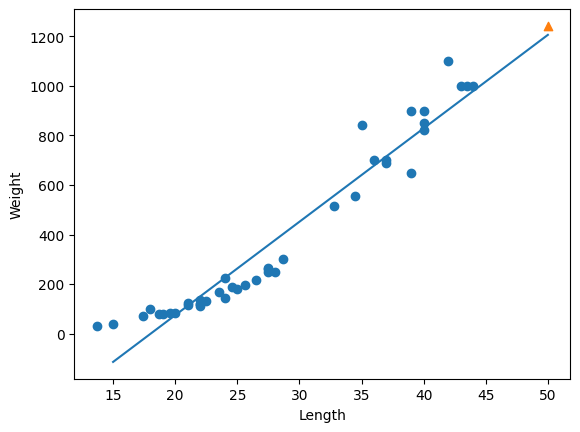

In [11]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

## R^2(정확도) 출력

In [12]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9351763963667021
0.8714637284198098


## 길이^2 항을 훈련 세트에 추가

In [14]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [15]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


## 다항 회귀 모델 훈련

In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))


[1524.89005641]


## (기울기, 절편) 계산

In [17]:
print(lr.coef_, lr.intercept_)

[  0.96849621 -20.05140297] 106.2196743097158


## 산점도 출력

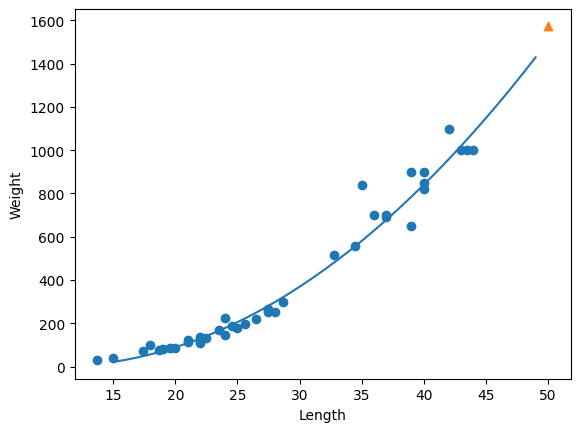

In [18]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 0.96 * point**2 - 20.05 * point + 106.21)

plt.scatter(50, 1574, marker = '^')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

## R^2(정확도) 출력

In [20]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9686947965031927
0.9806573263153171
